# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json



# Import API key
import api_keys
api_key="9a356910c2107ac5d74051c69d65c8a1"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
cities

['baherden',
 'rikitea',
 'nizhneyansk',
 'taolanaro',
 'carnarvon',
 'tabou',
 'kapaa',
 'grand centre',
 'busselton',
 'burica',
 'arraial do cabo',
 'temirtau',
 'port alfred',
 'port elizabeth',
 'inverell',
 'hambantota',
 'butaritari',
 'port moresby',
 'bundaberg',
 'los llanos de aridane',
 'duz',
 'ushuaia',
 'laguna',
 'atuona',
 'norman wells',
 'impfondo',
 'hilo',
 'grand gaube',
 'jamestown',
 'albany',
 'jalu',
 'port-gentil',
 'puerto ayora',
 'alofi',
 'kununurra',
 'hermanus',
 'kodiak',
 'mataura',
 'astara',
 'barentsburg',
 'krasnoselkup',
 'asmara',
 'aitape',
 'attawapiskat',
 'bredasdorp',
 'kyaikto',
 'vaini',
 'karkaralinsk',
 'bluff',
 'klaksvik',
 'truro',
 'dalbandin',
 'new norfolk',
 'cape town',
 'srednekolymsk',
 'bosaso',
 'avarua',
 'hithadhoo',
 'tayoltita',
 'hobart',
 'punta arenas',
 'kilindoni',
 'kahului',
 'georgetown',
 'airai',
 'saskylakh',
 'sept-iles',
 'pisco',
 'bambous virieux',
 'ust-nera',
 'souillac',
 'tabiauea',
 'namibe',
 'qaanaa

In [30]:
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()


url = "http://api.openweathermap.org/data/2.5/weather?"
city = "timizart"

query_url = url + "appid=" + api_key + "&q=" + city
query_url




'http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=timizart'

In [31]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 4.25, 'lat': 36.8},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 276.16,
  'pressure': 1027.3,
  'humidity': 91,
  'temp_min': 276.16,
  'temp_max': 276.16,
  'sea_level': 1027.3,
  'grnd_level': 961.94},
 'wind': {'speed': 0.81, 'deg': 331},
 'clouds': {'all': 0},
 'dt': 1550951932,
 'sys': {'message': 0.0031,
  'country': 'DZ',
  'sunrise': 1550902870,
  'sunset': 1550943113},
 'id': 2476396,
 'name': 'Timizart',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_json["coord"]["lat"]
weather_json["coord"]["lat"]
weather_json["main"]["temp"]

#do same format for other two below

276.16

In [33]:
df2 = pd.DataFrame({"City":cities})
df2
df2["Temp"] = np.nan
df2
df2["Humidity"] = np.nan
df2
df2["Cloudiness"] = np.nan
df2["Wind Speed"] = np.nan
df2
#add humidity and others after!


,City,Temp,Humidity,Cloudiness,Wind Speed
0,baherden,NaN,NaN,NaN,NaN
1,rikitea,NaN,NaN,NaN,NaN
2,nizhneyansk,NaN,NaN,NaN,NaN
3,taolanaro,NaN,NaN,NaN,NaN
4,carnarvon,NaN,NaN,NaN,NaN
5,tabou,NaN,NaN,NaN,NaN
6,kapaa,NaN,NaN,NaN,NaN
7,grand centre,NaN,NaN,NaN,NaN
8,busselton,NaN,NaN,NaN,NaN
9,burica,NaN,NaN,NaN,NaN


In [42]:
for index, row in df2[0:100].iterrows():
    try:
        row = row.copy()
        city= row['City']
        print(city)

        url = "http://api.openweathermap.org/data/2.5/weather?"

        query_url = url + "appid=" + api_key + "&q=" + city
        print(query_url)

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_json


        df2.at[index,"Temp"]= weather_json["main"]["temp"]
        df2.at[index,"Humidity"]= weather_json["main"]["humidity"]
        df2.at[index,"Cloudiness"]= weather_json["clouds"]["all"]
        df2.at[index,"Wind Speed"]= weather_json["wind"]["speed"]
        df2.at[index,"lat"]= weather_json["coord"]["lat"]
        df2.at[index,"lon"]= weather_json["coord"]["lon"]

        
        #DD OTHER 2 COLUMNS SAME WAY
        
        
        
    except KeyError:
        print(f"Oops, {row.copy()} doesn't exist.")

    
    
    
    
    
    

baherden
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=baherden
rikitea
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=rikitea
nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=nizhneyansk
Oops, City          nizhneyansk
Temp                  NaN
Humidity              NaN
Cloudiness            NaN
Wind Speed            NaN
lat                   NaN
lon                   NaN
Name: 2, dtype: object doesn't exist.
taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=taolanaro
Oops, City          taolanaro
Temp                NaN
Humidity            NaN
Cloudiness          NaN
Wind Speed          NaN
lat                 NaN
lon                 NaN
Name: 3, dtype: object doesn't exist.
carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=carnarvon
tabou
http://api.openwea

hobart
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=hobart
punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=punta arenas
kilindoni
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=kilindoni
kahului
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=kahului
georgetown
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=georgetown
airai
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=airai
saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=saskylakh
sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=sept-iles
pisco
http://api.openweathermap.org/data/2.5/weather?appid=9a356910c2107ac5d74051c69d65c8a1&q=pisco
bambous virieux
http://api.openweathermap.org/

In [49]:
df2

,City,Temp,Humidity,Cloudiness,Wind Speed,lat,lon
0,baherden,274.885,83.0,0.0,1.16,38.44,57.43
1,rikitea,300.085,99.0,68.0,4.11,-23.12,-134.97
2,nizhneyansk,NaN,NaN,NaN,NaN,NaN,NaN
3,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN
4,carnarvon,293.285,34.0,8.0,3.51,-30.97,22.13
5,tabou,302.110,95.0,0.0,4.91,4.42,-7.36
6,kapaa,296.150,69.0,1.0,2.10,22.08,-159.32
7,grand centre,NaN,NaN,NaN,NaN,NaN,NaN
8,busselton,290.710,100.0,0.0,4.61,-33.64,115.35
9,burica,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#extract component



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

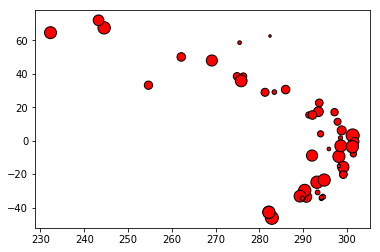

In [45]:
plt.scatter(df2['Temp'], df2['lat'], df2['lon'], marker="o", facecolors="red", edgecolors="black")

#### Latitude vs. Humidity Plot

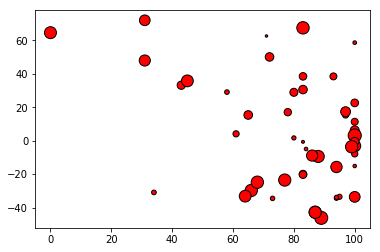

In [46]:
plt.scatter(df2['Humidity'], df2['lat'], df2['lon'], marker="o", facecolors="red", edgecolors="black")

#### Latitude vs. Cloudiness Plot

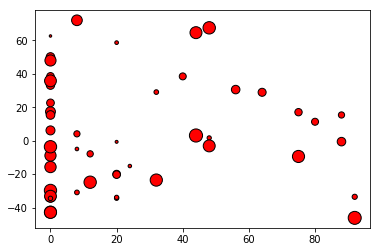

In [47]:
plt.scatter(df2['Cloudiness'], df2['lat'], df2['lon'], marker="o", facecolors="red", edgecolors="black")

#### Latitude vs. Wind Speed Plot

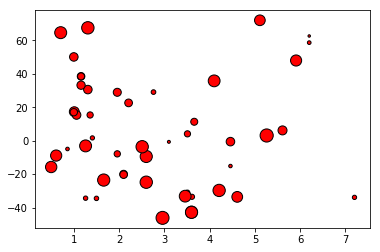

In [48]:
plt.scatter(df2['Wind Speed'], df2['lat'], df2['lon'], marker="o", facecolors="red", edgecolors="black")